In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [2]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False,
                 "font.family"   : "Times New Roman", "font.scale": 1.5}

sns.set_style(style="ticks", rc=custom_params) #设置绘图风格

In [3]:
test_loss_1 = np.load('../experimental_data/method_1/test_loss_1.npy')
test_loss_2 = np.load('../experimental_data/method_2/test_loss_2.npy')
test_loss_3 = np.load('../experimental_data/method_3/test_loss_3.npy')
test_loss_4 = np.load('../experimental_data/method_4/test_loss_4.npy')
test_loss_5 = np.load('../experimental_data/method_5/test_loss_5.npy')

loss_all_1 = np.load('../experimental_data/method_1/loss_all_1.npy')
loss_all_2 = np.load('../experimental_data/method_2/loss_all_2.npy')
loss_all_3 = np.load('../experimental_data/method_3/loss_all_3.npy')
loss_all_4 = np.load('../experimental_data/method_4/loss_all_4.npy')
loss_all_5 = np.load('../experimental_data/method_5/loss_all_5.npy')

test_loss_1 = np.array(test_loss_1) 
test_loss_2 = np.array(test_loss_2) 
test_loss_3 = np.array(test_loss_3) 
test_loss_4 = np.array(test_loss_4) 
test_loss_5 = np.array(test_loss_5) 
loss_all_1 = np.array(loss_all_1) 
loss_all_2 = np.array(loss_all_2) 
loss_all_3 = np.array(loss_all_3) 
loss_all_4 = np.array(loss_all_4) 
loss_all_5 = np.array(loss_all_5) 

In [4]:
print('e1:',test_loss_1[-1],'e2:',test_loss_2[-1],'e3:',test_loss_3[-1],'e4:',test_loss_4[-1],'e5:',test_loss_5[-1])

e1: 0.0048729223 e2: 0.004281451 e3: 0.013341959 e4: 0.0033671844 e5: 0.006359493


In [5]:
x1 = np.arange(len(test_loss_1))+1
x2 = np.arange(len(test_loss_2))+1
x3 = np.arange(len(test_loss_3))+1
x4 = np.arange(len(test_loss_4))+1
x5 = np.arange(len(test_loss_5))+1

print( '$\mathrm{PINN}$',len(test_loss_1),'$\mathrm{GA-PINN}$',len(test_loss_2),
      '$\mathrm { PINN }^{\dagger}$',len(test_loss_3),'$\mathrm { GA - PINN }^{\dagger}$',len(test_loss_4),'$\mathrm { GA - PINN* }$',
      len(test_loss_5))

$\mathrm{PINN}$ 4494 $\mathrm{GA-PINN}$ 1485 $\mathrm { PINN }^{\dagger}$ 1207 $\mathrm { GA - PINN }^{\dagger}$ 1142 $\mathrm { GA - PINN* }$ 3109


In [6]:
def flatten_line(data):
    for i in range(1, len(data)):
        if data[i] > data[i - 1]:
            data[i] = data[i - 1]
    return data

test_loss_1_smooth = flatten_line(test_loss_1.copy())
test_loss_2_smooth = flatten_line(test_loss_2.copy())
test_loss_3_smooth = flatten_line(test_loss_3.copy())
test_loss_4_smooth = flatten_line(test_loss_4.copy())
test_loss_5_smooth = flatten_line(test_loss_5.copy())

In [7]:
times = 180

x1_index = np.arange(0,len(test_loss_1),times)
x2_index = np.arange(0,len(test_loss_2),times)
x3_index = np.arange(0,len(test_loss_3),times)
x4_index = np.arange(0,len(test_loss_4),times)
x5_index = np.arange(0,len(test_loss_5),times)

x1_index = np.concatenate((x1_index,[len(test_loss_1)-1]),axis=0)
x2_index = np.concatenate((x2_index,[len(test_loss_2)-1]),axis=0)
x3_index = np.concatenate((x3_index,[len(test_loss_3)-1]),axis=0)
x4_index = np.concatenate((x4_index,[len(test_loss_4)-1]),axis=0)
x5_index = np.concatenate((x5_index,[len(test_loss_5)-1]),axis=0)

meta NOT subset; don't know how to subset; dropped


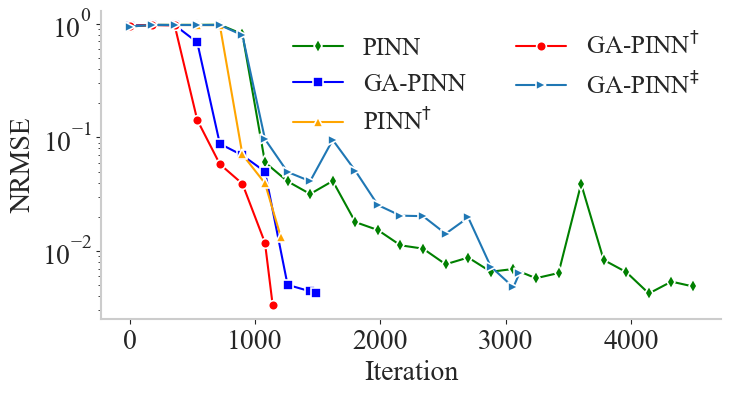

In [8]:
plt.figure(figsize=(8,4))

sns.lineplot(x=x1_index,y=test_loss_1[x1_index],label = 'PINN',c='g', marker="d", markersize=7, markeredgecolor="white", markeredgewidth=1.2)
sns.lineplot(x=x2_index,y=test_loss_2[x2_index],label = 'GA-PINN',c='b', marker="s", markersize=7, markeredgecolor="white", markeredgewidth=1.2)
sns.lineplot(x=x3_index,y=test_loss_3[x3_index],label = 'PINN$^{\dag}$',c='orange', marker="^", markersize=7, markeredgecolor="white", markeredgewidth=1.2)
sns.lineplot(x=x4_index,y=test_loss_4[x4_index],label = 'GA-PINN$ ^{\dag}$',c='r', marker="o", markersize=7, markeredgecolor="white", markeredgewidth=1.2)
sns.lineplot(x=x5_index,y=test_loss_5[x5_index],label = 'GA-PINN$^{\ddag }$', marker=">", markersize=7, markeredgecolor="white", markeredgewidth=1.2)

plt.xlabel('Iteration',fontsize=20)
plt.ylabel('NRMSE',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(loc='upper right', frameon=False, fontsize=18, ncol=2)

for spine in plt.gca().spines.values():
    spine.set_edgecolor("#CCCCCC")
    spine.set_linewidth(1.5)
    
plt.yscale('log')

plt.savefig('../figures/Helmholtz_NRMSE.pdf', dpi=300, bbox_inches='tight', format='pdf')
plt.show()